<a href="https://colab.research.google.com/github/Jihene-ch/Assignment-1/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from wordcloud import WordCloud, STOPWORDS
def make_display_wordcloud(tweets):
  text = " ".join(tweets)
  wc = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)
  plt.figure(figsize=(6, 3))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()

# Data preprocessing

In [ ]:
import nltk
import re                                  
import string                             
from nltk.tokenize import TweetTokenizer 
from tqdm import tqdm
def tokenize_tweet(tweet):
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tweet = re.sub(r'[0-9]', '', tweet)
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
  tokens = tokenizer.tokenize(tweet)
  tokens = [word.lower() for word in tokens]
  tokens = [token for token in tokens if token not in string.punctuation]
  return tokens

In [ ]:
import json
tweets = []
for line in open('/content/drive/MyDrive/Cloud_Computing_Project/datasets/tweets_zta.json', 'r'):
    tweets.append(json.loads(line))
for line in open('/content/drive/MyDrive/Cloud_Computing_Project/datasets/tweets_zerotrust.json', 'r'):
    tweets.append(json.loads(line))

In [ ]:
keep = []
for tweet in tweets:
  keep.append(tweet['rawContent'])

In [ ]:
clean_tweets = []
for tweet in tqdm(keep):
  clean_tweets.append(tokenize_tweet(tweet))

100%|██████████| 4000/4000 [00:01<00:00, 2072.10it/s]


In [ ]:
tweet_with_article = 0;
for tweet in clean_tweets:
  tweet_with_article += tweet.count("article")
  tweet_with_article += tweet.count("articles")

In [ ]:
print(tweet_with_article)

92


# KMeans

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = clean_tweets,
                 window = 4, 
                 sg = 1,
                 vector_size = 150,
                 negative = 3,
                 epochs = 3)
vectors = model.wv
vectors.save('/content/drive/MyDrive/model.wordvectors')

In [ ]:
import gensim.downloader as api
from gensim.models import KeyedVectors
vectors = KeyedVectors.load('/content/drive/MyDrive/model.wordvectors')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, max_iter = 1000)
kmeans.fit(model.wv.vectors)
positive_cluster_center = kmeans.cluster_centers_[0]
negative_cluster_center = kmeans.cluster_centers_[1]

In [ ]:
words_positive = model.wv.similar_by_vector(positive_cluster_center, topn=20, restrict_vocab=None)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


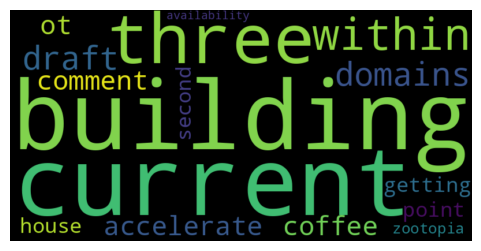

In [ ]:
positive_words = [pair[0] for pair in words_positive]
make_display_wordcloud(positive_words)

In [ ]:
words_negative = model.wv.similar_by_vector(negative_cluster_center, topn=20, restrict_vocab=None)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


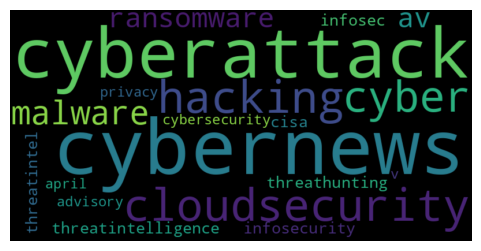

In [ ]:
negative_words = [pair[0] for pair in words_negative]
make_display_wordcloud(negative_words)

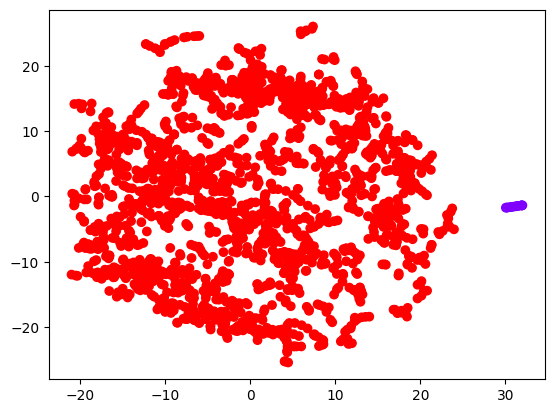

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=3, perplexity=5.0, early_exaggeration=12.0)
vectors_2d = tsne.fit_transform(model.wv.vectors)
labels = kmeans.labels_
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=labels, cmap='rainbow')
plt.show()

# Textblob

In [ ]:
positive = 0
negative = 0
neutral = 0

In [ ]:
from textblob import TextBlob
def get_analysis(score):
  if score < 0:
    negative += 1
    return 'Negative'
  elif score == 0:
    neutral += 1
    return 'Neutral'
  else:
    positive += 1
    return 'Positive'

In [ ]:
from tqdm import tqdm

positive_tweets = []
negative_tweets = []
neutral_tweets = []
average_positive = 0
average_negative = 0
average_neutral = 0
overall_sentiment = 0
for tweet in tqdm(clean_tweets):
  tweet = " ".join(tweet)
  polarity = TextBlob(tweet).sentiment.polarity
  if polarity > 0:
    positive += 1
    positive_tweets.append(tweet)
    average_positive += polarity
  elif polarity < 0:
    negative += 1
    negative_tweets.append(tweet)
    average_negative += polarity
  else:
    neutral += 1
    neutral_tweets.append(tweet)
    average_neutral += polarity
  overall_sentiment += polarity

100%|██████████| 4000/4000 [00:01<00:00, 3276.61it/s]


In [ ]:
print("positive tweets: ", positive)
print("negative tweets: ", negative)
print("neutral tweets: ", neutral)

positive tweets:  1780
negative tweets:  294
neutral tweets:  1926


In [ ]:
print(positive_tweets[0])
print(negative_tweets[0])
print(neutral_tweets[0])

identity security is proving more important for zerotrust than ever zta see the article here
don't fall victim to a costly breach get a safous demo today to discover how we keep your network safer than ever zta
can you join us techconnect wednesday april sheraton imperial hotel durham nc ai bigdata zta analytics innovation automation privacy security apis socialengineering insiderthreat bring your questions


In [ ]:
print(positive_tweets[2])
print(negative_tweets[2])
print(neutral_tweets[2])

cisa had published the zero trust security model .. the update adds an additional maturity stage of “ optimal ” alongside traditional initial and advanced zerotrust zta cybersecurity
a rare picture of two goats september harare game recognizing game zimswag zta
the next wave in zerotrust zta check out the article here


In [ ]:
print(average_positive / positive)
print(average_negative / negative)
print(average_neutral / neutral)

0.32863293720688325
-0.19934757765540073
0.0


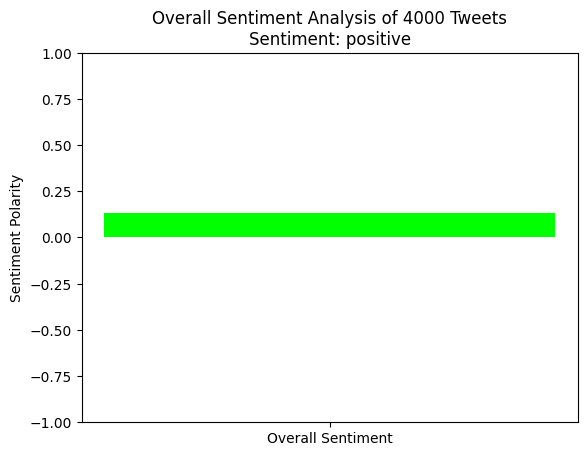

In [ ]:
import matplotlib.pyplot as plt

overall_sentiment /= len(clean_tweets)

if overall_sentiment > 0:
    sentiment_label = 'positive'
elif overall_sentiment < 0:
    sentiment_label = 'negative'
else:
    sentiment_label = 'neutral'

labels = ['Overall Sentiment']
scores = [overall_sentiment]
colors = ['#00ff00' if overall_sentiment > 0 else '#ff0000' if overall_sentiment < 0 else '#d3d3d3']
plt.bar(labels, scores, color=colors)
plt.title(f'Overall Sentiment Analysis of {len(tweets)} Tweets\nSentiment: {sentiment_label}')
plt.ylim([-1, 1])
plt.ylabel('Sentiment Polarity')
plt.show()

In [ ]:
print(overall_sentiment)

0.13158961009939132


In [ ]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


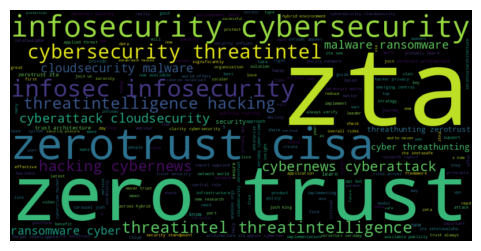

In [ ]:
make_display_wordcloud(positive_tweets)

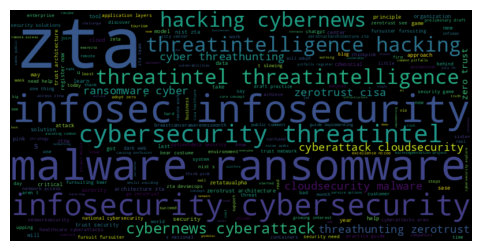

In [ ]:
make_display_wordcloud(negative_tweets)

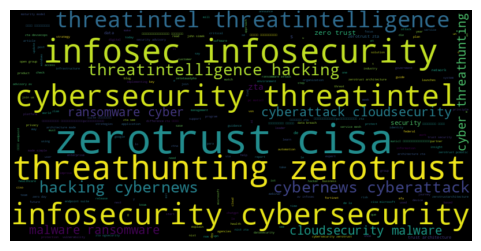

In [ ]:
make_display_wordcloud(neutral_tweets)

# Topic Modeling

In [ ]:
! pip install pyLDAvis

In [ ]:
from scipy.sparse import csc_matrix
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.corpora import Dictionary
import collections

In [ ]:
def makeDocumentDictionaries(documents):
  token2ID = {}
  ID2Token = {}
  documentDictionaries = []
  nextID = 0
  tokenCount = collections.defaultdict(int)

  for document in tqdm(documents):

    tokens = tokenize_tweet(document)
    documentDictionary = collections.defaultdict(int)

    for token in tokens:
      if token not in token2ID:
        token2ID[token] = nextID
        ID2Token[nextID] = token
        nextID += 1
      tokenCount[token] += 1

      documentDictionary[token2ID[token]] += 1

    documentDictionaries.append(documentDictionary)
    
  return documentDictionaries, token2ID, ID2Token,  tokenCount

In [ ]:
def makeDocumentTermMatrix(documentDictionaries):

  data = []
  rows = []
  columns = []

  #document is the row number documentDictionary is the keys
  #tokenID is the column number
  for document, documentDictionary in enumerate(documentDictionaries):
      for tokenID, count in documentDictionary.items():
          data.append(count)
          rows.append(document)
          columns.append(tokenID)
  termMatrix = csc_matrix((data, (rows, columns)))

  return termMatrix

In [ ]:
tokenized_documents = []
for document in tqdm(keep):
  tokenized_documents.append(tokenize_tweet(document))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 4000/4000 [00:01<00:00, 2539.49it/s]


In [ ]:
documentDictionaries, token2ID, ID2Token,  tokenCount = makeDocumentDictionaries(keep)

In [ ]:
termMatrix = makeDocumentTermMatrix(documentDictionaries)

In [ ]:
corpus = Sparse2Corpus(termMatrix, documents_columns=False)
dictionary = Dictionary()
dictionary.token2id = ID2Token
ldaModel = LdaModel(corpus = corpus, id2word = ID2Token, num_topics = 4, iterations = 100)

In [ ]:
ldaModel.print_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.045*"threatintelligence" + 0.045*"cyberattack" + 0.038*"cybersecurity" + 0.038*"zerotrust" + 0.038*"cisa" + 0.036*"infosecurity" + 0.035*"malware" + 0.032*"infosec" + 0.031*"ransomware" + 0.022*"cybernews"'),
 (1,
  '0.023*"zerotrust" + 0.022*"the" + 0.019*"and" + 0.017*"zta" + 0.017*"a" + 0.015*"for" + 0.014*"cybersecurity" + 0.013*"to" + 0.013*"in" + 0.013*"infosecurity"'),
 (2,
  '0.018*"cybersecurity" + 0.015*"to" + 0.015*"zta" + 0.013*"and" + 0.011*"cloudsecurity" + 0.011*"zerotrust" + 0.011*"infosecurity" + 0.010*"the" + 0.010*"threathunting" + 0.010*"cyber"'),
 (3,
  '0.067*"hacking" + 0.035*"cyber" + 0.034*"cloudsecurity" + 0.032*"zerotrust" + 0.022*"ransomware" + 0.020*"to" + 0.020*"infosec" + 0.020*"the" + 0.018*"cybersecurity" + 0.017*"cybernews"')]

# Sentiment Analysis on Google News

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install feedparser
!pip install dateparser==0.7.6

In [ ]:
!git clone https://github.com/kotartemiy/pygooglenews.git
%cd pygooglenews
!python setup.py install

Cloning into 'pygooglenews'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 54 (delta 26), reused 27 (delta 9), pack-reused 0
Unpacking objects: 100% (54/54), 3.85 MiB | 8.43 MiB/s, done.
/content/pygooglenews
python3: can't open file '/content/pygooglenews/setup.py': [Errno 2] No such file or directory


In [ ]:
!pip install pygooglenews

In [ ]:
!pip install gnewsclient

In [ ]:
!curl -O https://files.pythonhosted.org/packages/3f/d5/695ef6cd1da80e090534562ba354bc72876438ae91d3693d6bd2afc947df/pygooglenews-0.1.2.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13891  100 13891    0     0    98k      0 --:--:-- --:--:-- --:--:--   98k


In [ ]:
!tar -zxvf pygooglenews-0.1.2.tar.gz


In [ ]:
!pip install pygooglenews-0.1.2/


In [ ]:
from pygooglenews import GoogleNews
import pandas as pd

In [ ]:
gn = []
gn.append(GoogleNews(lang='fr',country="FR"))
gn.append(GoogleNews(lang='en',country="US"))
gn.append(GoogleNews(lang='en',country="UK"))

In [ ]:
search =[]
search.append(gn[0].search('zero trust OR zero trust architecture OR zero trust securité'))
search.append(gn[1].search('zero trust OR zero trust architecture OR zero trust security'))
search.append(gn[2].search('zero trust OR zero trust architecture OR zero trust security'))

In [ ]:
for one_search in search:
  for i in one_search['entries']:
    print(i)

{'title': "Qu'est-ce qu'une architecture réseau zero trust ? - LeMondeInformatique", 'title_detail': {'type': 'text/plain', 'language': None, 'base': '', 'value': "Qu'est-ce qu'une architecture réseau zero trust ? - LeMondeInformatique"}, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'https://news.google.com/rss/articles/CBMibWh0dHBzOi8vd3d3LmxlbW9uZGVpbmZvcm1hdGlxdWUuZnIvYWN0dWFsaXRlcy9saXJlLXF1LWVzdC1jZS1xdS11bmUtYXJjaGl0ZWN0dXJlLXJlc2VhdS16ZXJvLXRydXN0LTg5NzU0Lmh0bWzSAQA?oc=5'}], 'link': 'https://news.google.com/rss/articles/CBMibWh0dHBzOi8vd3d3LmxlbW9uZGVpbmZvcm1hdGlxdWUuZnIvYWN0dWFsaXRlcy9saXJlLXF1LWVzdC1jZS1xdS11bmUtYXJjaGl0ZWN0dXJlLXJlc2VhdS16ZXJvLXRydXN0LTg5NzU0Lmh0bWzSAQA?oc=5', 'id': 'CBMibWh0dHBzOi8vd3d3LmxlbW9uZGVpbmZvcm1hdGlxdWUuZnIvYWN0dWFsaXRlcy9saXJlLXF1LWVzdC1jZS1xdS11bmUtYXJjaGl0ZWN0dXJlLXJlc2VhdS16ZXJvLXRydXN0LTg5NzU0Lmh0bWzSAQA', 'guidislink': False, 'published': 'Tue, 04 Apr 2023 07:00:00 GMT', 'published_parsed': time.struct_time(tm_year=2023, tm_mon

In [ ]:
news=[]
for one_search in search:
  for i in one_search['entries']:
    article= {'title': i.title,'link': i.link, 'summary': i.summary, "published":i.published}
    news.append(article)
print(news)

[{'title': "Qu'est-ce qu'une architecture réseau zero trust ? - LeMondeInformatique", 'link': 'https://news.google.com/rss/articles/CBMibWh0dHBzOi8vd3d3LmxlbW9uZGVpbmZvcm1hdGlxdWUuZnIvYWN0dWFsaXRlcy9saXJlLXF1LWVzdC1jZS1xdS11bmUtYXJjaGl0ZWN0dXJlLXJlc2VhdS16ZXJvLXRydXN0LTg5NzU0Lmh0bWzSAQA?oc=5', 'summary': '<a href="https://news.google.com/rss/articles/CBMibWh0dHBzOi8vd3d3LmxlbW9uZGVpbmZvcm1hdGlxdWUuZnIvYWN0dWFsaXRlcy9saXJlLXF1LWVzdC1jZS1xdS11bmUtYXJjaGl0ZWN0dXJlLXJlc2VhdS16ZXJvLXRydXN0LTg5NzU0Lmh0bWzSAQA?oc=5" target="_blank">Qu\'est-ce qu\'une architecture réseau zero trust ?</a>&nbsp;&nbsp;<font color="#6f6f6f">LeMondeInformatique</font>', 'published': 'Tue, 04 Apr 2023 07:00:00 GMT'}, {'title': 'La Cisa met à jour son modèle de maturité zero trust - LeMondeInformatique', 'link': 'https://news.google.com/rss/articles/CBMicmh0dHBzOi8vd3d3LmxlbW9uZGVpbmZvcm1hdGlxdWUuZnIvYWN0dWFsaXRlcy9saXJlLWxhLWNpc2EtbWV0LWEtam91ci1zb24tbW9kZWxlLWRlLW1hdHVyaXRlLXplcm8tdHJ1c3QtOTAxNjcuaHRtbNIBdWh0dHBzOi

In [ ]:
len(news)

294

In [ ]:
df = pd.DataFrame(news)

In [ ]:
df.head()

title  \
0  Qu'est-ce qu'une architecture réseau zero trus...   
1  La Cisa met à jour son modèle de maturité zero...   
2  infoDSI : Le quotidien des utilisateurs de l'i...   
3        L'actualité de la mobilité - ITRmobiles.com   
4  Royal Caribbean adopte le zero trust sur terre...   

                                                link  \
0  https://news.google.com/rss/articles/CBMibWh0d...   
1  https://news.google.com/rss/articles/CBMicmh0d...   
2  https://news.google.com/rss/articles/CBMigwFod...   
3  https://news.google.com/rss/articles/CBMihgFod...   
4  https://news.google.com/rss/articles/CBMifGh0d...   

                                             summary  \
0  <a href="https://news.google.com/rss/articles/...   
1  <a href="https://news.google.com/rss/articles/...   
2  <a href="https://news.google.com/rss/articles/...   
3  <a href="https://news.google.com/rss/articles/...   
4  <a href="https://news.google.com/rss/articles/...   

                       published  
0  Tue, 04 Apr 2023 07:00:00 GMT  
1  Tue, 18 Apr 2023 07:06:31 GMT  
2  Sun, 23 Apr 2023 17:00:14 GMT  
3  Sun, 23 Apr 2023 17:02:29 GMT  
4  Thu, 06 Apr 2023 07:00:00 GMT

In [ ]:
from textblob import TextBlob

In [ ]:
!pip install langdetect

In [ ]:
from langdetect import detect

language=[]
for title in df['title']:
  language.append(detect(title))
df['language']=language

In [ ]:
df.head()

title  \
0  Qu'est-ce qu'une architecture réseau zero trus...   
1  La Cisa met à jour son modèle de maturité zero...   
2  infoDSI : Le quotidien des utilisateurs de l'i...   
3        L'actualité de la mobilité - ITRmobiles.com   
4  Royal Caribbean adopte le zero trust sur terre...   

                                                link  \
0  https://news.google.com/rss/articles/CBMibWh0d...   
1  https://news.google.com/rss/articles/CBMicmh0d...   
2  https://news.google.com/rss/articles/CBMigwFod...   
3  https://news.google.com/rss/articles/CBMihgFod...   
4  https://news.google.com/rss/articles/CBMifGh0d...   

                                             summary  \
0  <a href="https://news.google.com/rss/articles/...   
1  <a href="https://news.google.com/rss/articles/...   
2  <a href="https://news.google.com/rss/articles/...   
3  <a href="https://news.google.com/rss/articles/...   
4  <a href="https://news.google.com/rss/articles/...   

                       published language  
0  Tue, 04 Apr 2023 07:00:00 GMT       fr  
1  Tue, 18 Apr 2023 07:06:31 GMT       fr  
2  Sun, 23 Apr 2023 17:00:14 GMT       fr  
3  Sun, 23 Apr 2023 17:02:29 GMT       fr  
4  Thu, 06 Apr 2023 07:00:00 GMT       fr

In [ ]:
def sentiment(text):
  blob=TextBlob(text)
  return blob.sentiment.polarity
  
df['sentiment'] =df['title'].apply(sentiment)

In [ ]:
df

title  \
0    Qu'est-ce qu'une architecture réseau zero trus...   
1    La Cisa met à jour son modèle de maturité zero...   
2    infoDSI : Le quotidien des utilisateurs de l'i...   
3          L'actualité de la mobilité - ITRmobiles.com   
4    Royal Caribbean adopte le zero trust sur terre...   
..                                                 ...   
289  DOD Releases Path to Cyber Security Through Ze...   
290  What is Zero Trust Network Access? - Network W...   
291  Fixing healthcare cyber security through 'zero...   
292  What CISOs Want to See From NIST's Impending Z...   
293  Boost SAP Security With Zero Trust - Security ...   

                                                  link  \
0    https://news.google.com/rss/articles/CBMibWh0d...   
1    https://news.google.com/rss/articles/CBMicmh0d...   
2    https://news.google.com/rss/articles/CBMigwFod...   
3    https://news.google.com/rss/articles/CBMihgFod...   
4    https://news.google.com/rss/articles/CBMifGh0d...   
..                                                 ...   
289  https://news.google.com/rss/articles/CBMihgFod...   
290  https://news.google.com/rss/articles/CBMiXmh0d...   
291  https://news.google.com/rss/articles/CBMiZmh0d...   
292  https://news.google.com/rss/articles/CBMiWWh0d...   
293  https://news.google.com/rss/articles/CBMiP2h0d...   

                                               summary  \
0    <a href="https://news.google.com/rss/articles/...   
1    <a href="https://news.google.com/rss/articles/...   
2    <a href="https://news.google.com/rss/articles/...   
3    <a href="https://news.google.com/rss/articles/...   
4    <a href="https://news.google.com/rss/articles/...   
..                                                 ...   
289  <a href="https://news.google.com/rss/articles/...   
290  <a href="https://news.google.com/rss/articles/...   
291  <a href="https://news.google.com/rss/articles/...   
292  <a href="https://news.google.com/rss/articles/...   
293  <a href="https://news.google.com/rss/articles/...   

                         published language  sentiment  
0    Tue, 04 Apr 2023 07:00:00 GMT       fr        0.0  
1    Tue, 18 Apr 2023 07:06:31 GMT       fr        0.0  
2    Sun, 23 Apr 2023 17:00:14 GMT       fr        0.0  
3    Sun, 23 Apr 2023 17:02:29 GMT       fr        0.0  
4    Thu, 06 Apr 2023 07:00:00 GMT       fr        0.0  
..                             ...      ...        ...  
289  Mon, 28 Nov 2022 08:00:00 GMT       en        0.0  
290  Thu, 22 Dec 2022 08:00:00 GMT       en        0.0  
291  Thu, 01 Dec 2022 08:00:00 GMT       en        0.0  
292  Thu, 29 Sep 2022 07:00:00 GMT       en        0.0  
293  Tue, 19 Jul 2022 07:00:00 GMT       en        0.0  

[294 rows x 6 columns]

In [ ]:
grouped = df.groupby(df.language)
df_fr = grouped.get_group("fr")
df_fr

title  \
0   Qu'est-ce qu'une architecture réseau zero trus...   
1   La Cisa met à jour son modèle de maturité zero...   
2   infoDSI : Le quotidien des utilisateurs de l'i...   
3         L'actualité de la mobilité - ITRmobiles.com   
4   Royal Caribbean adopte le zero trust sur terre...   
..                                                ...   
93  Cisco Live 2023 EMEA : Ce que les DSI doivent ...   
94  Interactivité & sécurité : les enjeux de la co...   
95  L'ANSSI vous donne rendez-vous à la ECW 2022 -...   
96  Ivanti Neuron intègre la protection des points...   
97  Comment les entreprises se protégeront des cyb...   

                                                 link  \
0   https://news.google.com/rss/articles/CBMibWh0d...   
1   https://news.google.com/rss/articles/CBMicmh0d...   
2   https://news.google.com/rss/articles/CBMigwFod...   
3   https://news.google.com/rss/articles/CBMihgFod...   
4   https://news.google.com/rss/articles/CBMifGh0d...   
..                                                ...   
93  https://news.google.com/rss/articles/CBMiWWh0d...   
94  https://news.google.com/rss/articles/CBMif2h0d...   
95  https://news.google.com/rss/articles/CBMiTmh0d...   
96  https://news.google.com/rss/articles/CBMihQFod...   
97  https://news.google.com/rss/articles/CBMibWh0d...   

                                              summary  \
0   <a href="https://news.google.com/rss/articles/...   
1   <a href="https://news.google.com/rss/articles/...   
2   <a href="https://news.google.com/rss/articles/...   
3   <a href="https://news.google.com/rss/articles/...   
4   <a href="https://news.google.com/rss/articles/...   
..                                                ...   
93  <a href="https://news.google.com/rss/articles/...   
94  <a href="https://news.google.com/rss/articles/...   
95  <a href="https://news.google.com/rss/articles/...   
96  <a href="https://news.google.com/rss/articles/...   
97  <a href="https://news.google.com/rss/articles/...   

                        published language  sentiment  
0   Tue, 04 Apr 2023 07:00:00 GMT       fr   0.000000  
1   Tue, 18 Apr 2023 07:06:31 GMT       fr   0.000000  
2   Sun, 23 Apr 2023 17:00:14 GMT       fr   0.000000  
3   Sun, 23 Apr 2023 17:02:29 GMT       fr   0.000000  
4   Thu, 06 Apr 2023 07:00:00 GMT       fr   0.000000  
..                            ...      ...        ...  
93  Mon, 13 Feb 2023 08:00:00 GMT       fr   0.136364  
94  Thu, 26 Jan 2023 08:00:00 GMT       fr   0.000000  
95  Thu, 10 Nov 2022 17:03:37 GMT       fr   0.000000  
96  Mon, 23 Jan 2023 08:00:00 GMT       fr   0.033333  
97  Tue, 20 Dec 2022 08:00:00 GMT       fr   0.000000  

[85 rows x 6 columns]

In [ ]:
def translation(text):
  blob =TextBlob(text)
  return str(blob.translate(from_lang='fr', to='en'))
  
def sentiment(text):
  blob=TextBlob(text)
  return blob.sentiment.polarity

df_fr['translation'] = df_fr['title'].apply(translation)
df_fr['trans_sent'] =df_fr['translation'].apply(sentiment)

<ipython-input-24-1faaf7008969>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fr['translation'] = df_fr['title'].apply(translation)
<ipython-input-24-1faaf7008969>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fr['trans_sent'] =df_fr['translation'].apply(sentiment)


In [ ]:
df_fr.head()

title  \
0  Qu'est-ce qu'une architecture réseau zero trus...   
1  La Cisa met à jour son modèle de maturité zero...   
2  infoDSI : Le quotidien des utilisateurs de l'i...   
3        L'actualité de la mobilité - ITRmobiles.com   
4  Royal Caribbean adopte le zero trust sur terre...   

                                                link  \
0  https://news.google.com/rss/articles/CBMibWh0d...   
1  https://news.google.com/rss/articles/CBMicmh0d...   
2  https://news.google.com/rss/articles/CBMigwFod...   
3  https://news.google.com/rss/articles/CBMihgFod...   
4  https://news.google.com/rss/articles/CBMifGh0d...   

                                             summary  \
0  <a href="https://news.google.com/rss/articles/...   
1  <a href="https://news.google.com/rss/articles/...   
2  <a href="https://news.google.com/rss/articles/...   
3  <a href="https://news.google.com/rss/articles/...   
4  <a href="https://news.google.com/rss/articles/...   

                       published language  sentiment  \
0  Tue, 04 Apr 2023 07:00:00 GMT       fr        0.0   
1  Tue, 18 Apr 2023 07:06:31 GMT       fr        0.0   
2  Sun, 23 Apr 2023 17:00:14 GMT       fr        0.0   
3  Sun, 23 Apr 2023 17:02:29 GMT       fr        0.0   
4  Thu, 06 Apr 2023 07:00:00 GMT       fr        0.0   

                                         translation  trans_sent  
0  What is a Zero Trust network architecture? - L...         0.0  
1  The Cisa updates its model of maturity Zero Tr...         0.0  
2  Infodsi: the daily life of user IT in business...         0.0  
3                    Mobility news - Itromobiles.com         0.0  
4  Royal Caribbean adopts the trust zero on land ...         0.0

In [ ]:
df_en = grouped.get_group("en")
df_fr = grouped.get_group("fr")

In [ ]:
def translation(text):
  blob =TextBlob(text)
  return str(blob.translate(from_lang='fr', to='en'))

df_fr['translation'] = df_fr['title'].apply(translation)
df_fr['trans_sent'] =df_fr['translation'].apply(sentiment)

<ipython-input-30-f18e75f3c701>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fr['translation'] = df_fr['title'].apply(translation)
<ipython-input-30-f18e75f3c701>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fr['trans_sent'] =df_fr['translation'].apply(sentiment)


In [ ]:
df_en['translation'] = df_en['title']
df_en['trans_sent'] =df_en['sentiment']

<ipython-input-31-4f7533b331bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['translation'] = df_en['title']
<ipython-input-31-4f7533b331bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['trans_sent'] =df_en['sentiment']


In [ ]:
df = pd.concat([df_fr, df_en], ignore_index=True)

In [ ]:
df.head()

title  \
0  Qu'est-ce qu'une architecture réseau zero trus...   
1  La Cisa met à jour son modèle de maturité zero...   
2  infoDSI : Le quotidien des utilisateurs de l'i...   
3        L'actualité de la mobilité - ITRmobiles.com   
4  Royal Caribbean adopte le zero trust sur terre...   

                                                link  \
0  https://news.google.com/rss/articles/CBMibWh0d...   
1  https://news.google.com/rss/articles/CBMicmh0d...   
2  https://news.google.com/rss/articles/CBMigwFod...   
3  https://news.google.com/rss/articles/CBMihgFod...   
4  https://news.google.com/rss/articles/CBMifGh0d...   

                                             summary  \
0  <a href="https://news.google.com/rss/articles/...   
1  <a href="https://news.google.com/rss/articles/...   
2  <a href="https://news.google.com/rss/articles/...   
3  <a href="https://news.google.com/rss/articles/...   
4  <a href="https://news.google.com/rss/articles/...   

                       published language  sentiment  \
0  Tue, 04 Apr 2023 07:00:00 GMT       fr        0.0   
1  Tue, 18 Apr 2023 07:06:31 GMT       fr        0.0   
2  Sun, 23 Apr 2023 17:00:14 GMT       fr        0.0   
3  Sun, 23 Apr 2023 17:02:29 GMT       fr        0.0   
4  Thu, 06 Apr 2023 07:00:00 GMT       fr        0.0   

                                         translation  trans_sent  
0  What is a Zero Trust network architecture? - L...         0.0  
1  The Cisa updates its model of maturity Zero Tr...         0.0  
2  Infodsi: the daily life of user IT in business...         0.0  
3                    Mobility news - Itromobiles.com         0.0  
4  Royal Caribbean adopts the trust zero on land ...         0.0

In [ ]:
df.shape

(291, 8)

In [ ]:
import numpy as np

df['sentiment']  = np.where(df['sentiment']<0,"negative",
                                  np.where(df['sentiment']>0,"positive",
                                           "neutral"))

In [ ]:
df['trans_sent']  = np.where(df['trans_sent']<0,"negative",
                                  np.where(
                                      df['trans_sent']>0,"positive",
                                           "neutral"))

In [ ]:
df.head()

title  \
0  Qu'est-ce qu'une architecture réseau zero trus...   
1  La Cisa met à jour son modèle de maturité zero...   
2  infoDSI : Le quotidien des utilisateurs de l'i...   
3        L'actualité de la mobilité - ITRmobiles.com   
4  Royal Caribbean adopte le zero trust sur terre...   

                                                link  \
0  https://news.google.com/rss/articles/CBMibWh0d...   
1  https://news.google.com/rss/articles/CBMicmh0d...   
2  https://news.google.com/rss/articles/CBMigwFod...   
3  https://news.google.com/rss/articles/CBMihgFod...   
4  https://news.google.com/rss/articles/CBMifGh0d...   

                                             summary  \
0  <a href="https://news.google.com/rss/articles/...   
1  <a href="https://news.google.com/rss/articles/...   
2  <a href="https://news.google.com/rss/articles/...   
3  <a href="https://news.google.com/rss/articles/...   
4  <a href="https://news.google.com/rss/articles/...   

                       published language sentiment  \
0  Tue, 04 Apr 2023 07:00:00 GMT       fr   neutral   
1  Tue, 18 Apr 2023 07:06:31 GMT       fr   neutral   
2  Sun, 23 Apr 2023 17:00:14 GMT       fr   neutral   
3  Sun, 23 Apr 2023 17:02:29 GMT       fr   neutral   
4  Thu, 06 Apr 2023 07:00:00 GMT       fr   neutral   

                                         translation trans_sent  
0  What is a Zero Trust network architecture? - L...    neutral  
1  The Cisa updates its model of maturity Zero Tr...    neutral  
2  Infodsi: the daily life of user IT in business...    neutral  
3                    Mobility news - Itromobiles.com    neutral  
4  Royal Caribbean adopts the trust zero on land ...    neutral

In [ ]:
df['sentiment'].value_counts(normalize=True)

neutral     0.731959
positive    0.233677
negative    0.034364
Name: sentiment, dtype: float64

In [ ]:
df['trans_sent'].value_counts(normalize=True)

neutral     0.676976
positive    0.278351
negative    0.044674
Name: trans_sent, dtype: float64

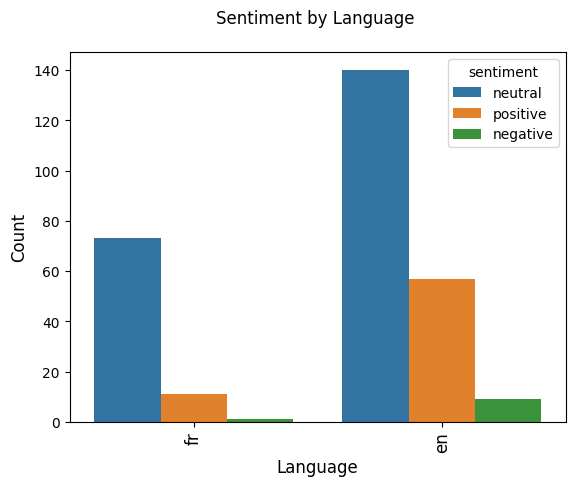

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

ax = sb.countplot(x="language", hue="sentiment", data=df)
plt.xlabel('Language', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Sentiment by Language \n', size = 12)
plt.show()

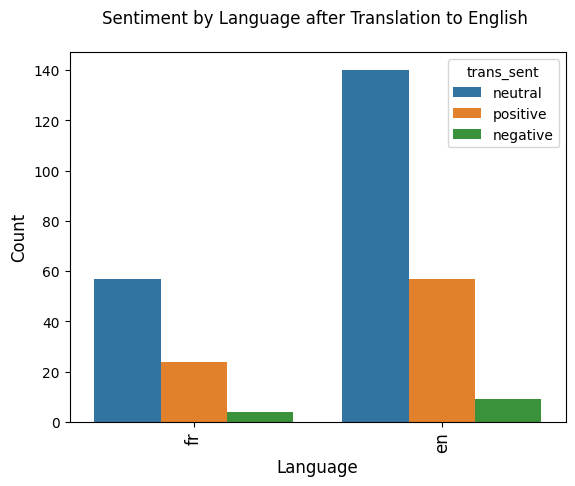

In [ ]:
ax = sb.countplot(x="language", hue="trans_sent", data=df)
plt.xlabel('Language', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Sentiment by Language after Translation to English \n', size = 12)
plt.show()

In [ ]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

In [ ]:
df['subjectivity']=df['translation'].apply(getSubjectivity)

In [ ]:
df.head()

title  \
0  Qu'est-ce qu'une architecture réseau zero trus...   
1  La Cisa met à jour son modèle de maturité zero...   
2  infoDSI : Le quotidien des utilisateurs de l'i...   
3        L'actualité de la mobilité - ITRmobiles.com   
4  Royal Caribbean adopte le zero trust sur terre...   

                                                link  \
0  https://news.google.com/rss/articles/CBMibWh0d...   
1  https://news.google.com/rss/articles/CBMicmh0d...   
2  https://news.google.com/rss/articles/CBMigwFod...   
3  https://news.google.com/rss/articles/CBMihgFod...   
4  https://news.google.com/rss/articles/CBMifGh0d...   

                                             summary  \
0  <a href="https://news.google.com/rss/articles/...   
1  <a href="https://news.google.com/rss/articles/...   
2  <a href="https://news.google.com/rss/articles/...   
3  <a href="https://news.google.com/rss/articles/...   
4  <a href="https://news.google.com/rss/articles/...   

                       published language sentiment  \
0  Tue, 04 Apr 2023 07:00:00 GMT       fr   neutral   
1  Tue, 18 Apr 2023 07:06:31 GMT       fr   neutral   
2  Sun, 23 Apr 2023 17:00:14 GMT       fr   neutral   
3  Sun, 23 Apr 2023 17:02:29 GMT       fr   neutral   
4  Thu, 06 Apr 2023 07:00:00 GMT       fr   neutral   

                                         translation trans_sent  subjectivity  
0  What is a Zero Trust network architecture? - L...    neutral           0.0  
1  The Cisa updates its model of maturity Zero Tr...    neutral           0.0  
2  Infodsi: the daily life of user IT in business...    neutral           0.0  
3                    Mobility news - Itromobiles.com    neutral           0.0  
4  Royal Caribbean adopts the trust zero on land ...    neutral           0.0

In [ ]:
df['subjectivity_class']  = np.where(df['subjectivity']<0.2,"very low",
                                  np.where(
                                      df['subjectivity']<0.4,"low",
                                           np.where(
                                      df['subjectivity']<0.6,"medium",
                                           np.where(
                                      df['subjectivity']<0.8,"high",
                                           "very high"))))

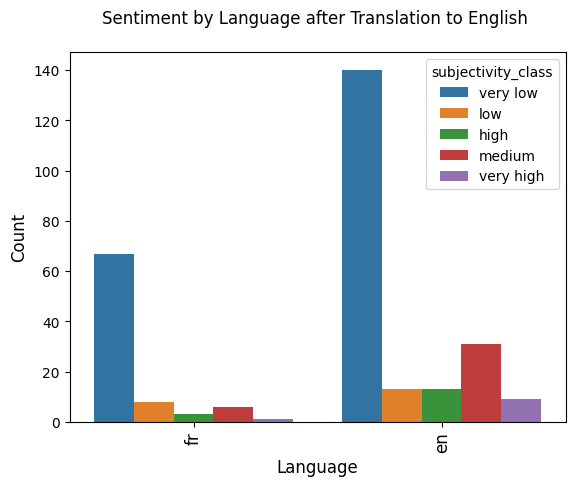

In [ ]:
ax = sb.countplot(x="language", hue="subjectivity_class", data=df)
plt.xlabel('Language', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Sentiment by Language after Translation to English \n', size = 12)
plt.show()

In [ ]:
df.loc[df['language']== 'fr','language'] = 1;
df.loc[df['language']== 'en','language'] = 2;
# df.loc[df['language']== 'ar','language'] = 3;
# df.loc[df['language']== 'ru','language'] = 4;
# df.loc[df['language']== 'uk','language'] = 5;

In [ ]:
df.loc[df['sentiment']== 'negative','sentiment'] = -1;
df.loc[df['sentiment']== 'positive','sentiment'] = 1;
df.loc[df['sentiment']== 'neutral','sentiment'] = 0;

In [ ]:
df.loc[df['trans_sent']== 'negative','trans_sent'] = -1;
df.loc[df['trans_sent']== 'positive','trans_sent'] = 1;
df.loc[df['trans_sent']== 'neutral','trans_sent'] = 0;

In [ ]:
from sklearn.model_selection import train_test_split 
 
X = df[['language','sentiment','trans_sent']]
Y = df['subjectivity_class']

# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, Y_train)
  
    training_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.7413793103448276, 0.6440677966101694]
3 : [0.8189655172413793, 0.6610169491525424]
4 : [0.8189655172413793, 0.6610169491525424]
5 : [0.8189655172413793, 0.6949152542372882]
6 : [0.8232758620689655, 0.6610169491525424]
7 : [0.8232758620689655, 0.6610169491525424]
8 : [0.8232758620689655, 0.6779661016949152]
9 : [0.8275862068965517, 0.711864406779661]
10 : [0.8232758620689655, 0.711864406779661]
11 : [0.8232758620689655, 0.711864406779661]
12 : [0.8232758620689655, 0.711864406779661]
13 : [0.8232758620689655, 0.711864406779661]
14 : [0.8232758620689655, 0.711864406779661]
15 : [0.8232758620689655, 0.711864406779661]
16 : [0.8232758620689655, 0.711864406779661]
17 : [0.8017241379310345, 0.6949152542372882]
18 : [0.8017241379310345, 0.6949152542372882]
19 : [0.8232758620689655, 0.711864406779661]
20 : [0.8017241379310345, 0.6949152542372882]


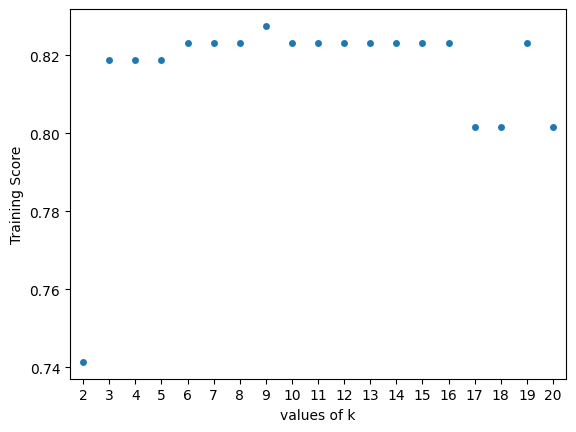

In [ ]:
ax = sb.stripplot(x =K, y =training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

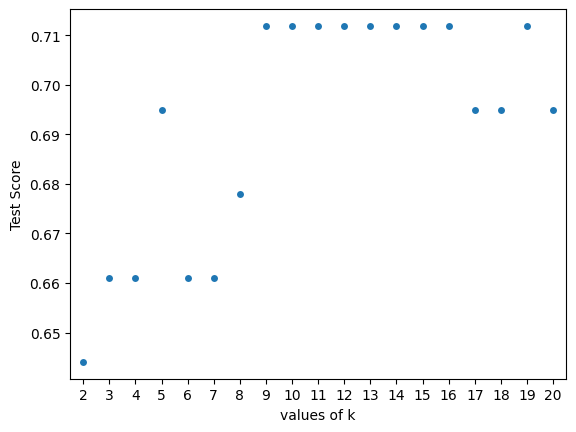

In [ ]:
ax = sb.stripplot(x=K, y=test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

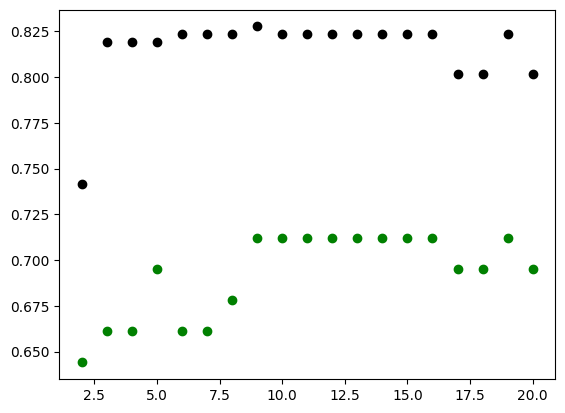

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

# NER on Research Papers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import os

# specify the path to the root directory in your Google Drive
root_path = '/content/drive/MyDrive/Research_Papers'

pdf_files = []

# walk through all the directories and files in the root directory
for dirpath, dirnames, filenames in os.walk(root_path):
    # loop through all the files in the current directory
    for filename in filenames:
        # check if the file extension is .pdf
        if filename.lower().endswith('.pdf'):
            # if it is, add the file path to the list of PDF files
            pdf_files.append(os.path.join(dirpath, filename))

# print the list of PDF files
print(pdf_files)

In [ ]:
!pip install PyMuPDF

In [ ]:
import fitz

In [ ]:
text = []
for file in pdf_files:
  pdf = fitz.open(file)
  for page in pdf:
    text.append(page.get_text())

In [ ]:
import re

In [ ]:
import numpy as np

# specify the file path and name for the output text file
output_file = '/content/corpus.txt'

# write the contents of the array to the output text file
np.savetxt(output_file, text, fmt='%s')

In [ ]:
from traitlets.traitlets import default
from nltk.corpus.reader import PlaintextCorpusReader
corpus =PlaintextCorpusReader(r"/content/",r'.*\.txt')

In [ ]:
corpus.fileids()

['corpus.txt']

In [ ]:
corpus.raw()

' \nSOFTWARE ENGINEERING INSTITUTE | CARNEGIE MELLON UNIVERSITY \nDesign: REV-03.18.2016.0 | Template: 02.05.2019 \n[DISTRIBUTION STATEMENT A] This material has been approved for public release and unlimited distribution.  Please see \nCopyright notice for non-US Government use and distribution. \nINTEGRATING ZERO TRUST AND DEVSECOPS  \nGeoffrey Sanders  \nTimothy Morrow  \nNathaniel Richmond \nCarol Woody, Ph.D. \nWhite Paper \nJuly 2021 \nExecutive Summary \nZero Trust (ZT) and DevSecOps are popular strategies that leverage automation to execute organiza-\ntional processes and workflows. ZT is a security strategy that uses policy to enforce explicit trust be-\ntween subjects and resources. DevSecOps is a development strategy that combines tools and agility to \ncontinuously develop and operate software. Both strategies are interdependent and require balancing \nconcerns of how services, data, and infrastructure must be shared to achieve efficiency, cost effective-\nness, and risk mit

In [ ]:
i=0
tmp=[]
for fileid in corpus.fileids():
    mylist =corpus.raw(fileid)
    i+=1
    tmp.append(mylist)
tmp

[' \nSOFTWARE ENGINEERING INSTITUTE | CARNEGIE MELLON UNIVERSITY \nDesign: REV-03.18.2016.0 | Template: 02.05.2019 \n[DISTRIBUTION STATEMENT A] This material has been approved for public release and unlimited distribution.  Please see \nCopyright notice for non-US Government use and distribution. \nINTEGRATING ZERO TRUST AND DEVSECOPS  \nGeoffrey Sanders  \nTimothy Morrow  \nNathaniel Richmond \nCarol Woody, Ph.D. \nWhite Paper \nJuly 2021 \nExecutive Summary \nZero Trust (ZT) and DevSecOps are popular strategies that leverage automation to execute organiza-\ntional processes and workflows. ZT is a security strategy that uses policy to enforce explicit trust be-\ntween subjects and resources. DevSecOps is a development strategy that combines tools and agility to \ncontinuously develop and operate software. Both strategies are interdependent and require balancing \nconcerns of how services, data, and infrastructure must be shared to achieve efficiency, cost effective-\nness, and risk mi

In [ ]:
corpus=np.array(tmp)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer handles preprocessing, tokenization and n-grams generation with its built-in functions
vect =CountVectorizer(stop_words=['english'])
# Convert our collection of texts to a matrix of token counts
vect.fit(corpus)

CountVectorizer(stop_words=['english'])

In [ ]:
tokens = vect.get_feature_names_out()
print(tokens)
print("Vocabulary size {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n{}".format(vect.vocabulary_))

['00' '000' '00001' ... '𝑖𝑎' '𝑖𝑖' '𝛱𝑖']
Vocabulary size 15882
Vocabulary content:
{'software': 13217, 'engineering': 5636, 'institute': 7871, 'carnegie': 3165, 'mellon': 9269, 'university': 14824, 'design': 4779, 'rev': 12195, '03': 45, '18': 316, '2016': 453, 'template': 14069, '02': 36, '05': 54, '2019': 460, 'distribution': 5081, 'statement': 13472, 'this': 14205, 'material': 9132, 'has': 7087, 'been': 2642, 'approved': 2138, 'for': 6407, 'public': 11449, 'release': 11943, 'and': 2002, 'unlimited': 14835, 'please': 10909, 'see': 12744, 'copyright': 4150, 'notice': 10012, 'non': 9973, 'us': 14920, 'government': 6857, 'use': 14932, 'integrating': 7897, 'zero': 15706, 'trust': 14578, 'devsecops': 4857, 'geoffrey': 6737, 'sanders': 12536, 'timothy': 14299, 'morrow': 9605, 'nathaniel': 9774, 'richmond': 12261, 'carol': 3166, 'woody': 15520, 'ph': 10773, 'white': 15430, 'paper': 10521, 'july': 8297, '2021': 472, 'executive': 5937, 'summary': 13746, 'zt': 15742, 'are': 2184, 'popular': 110

In [ ]:
# Transform documents to document-term matrix
X =vect.transform(corpus)
print(X.shape)
print(X.toarray())

(1, 15882)
[[25 14  2 ...  1 10  7]]


In [ ]:
print(vect.inverse_transform(X))

[array(['00', '000', '00001', ..., '𝑖𝑎', '𝑖𝑖', '𝛱𝑖'], dtype='<U101')]


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!pip install --upgrade spacy

In [ ]:
import spacy
from spacy import displacy

In [ ]:
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

In [ ]:
nlp = spacy.load("en_core_web_lg")
nlp_sm = spacy.load("en_core_web_sm")